In [1]:
import sys
sys.path.append(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\module") 

# Adds the directory path containing custom Python modules
# This allows for easy import of modules or packages stored in this directory

In [2]:
import pandas as pd
from to_import_data import *
from sanity_check import *
from basic_compute import *
from to_plot_data import *
from preprocessing import *
from to_resample import *
from to_compute_model import *
from evaluation_of_model import *
from to_plot_roc_auc import *

Travaux présenté par :


*Mahussi HOUNKPONOU*


*Takwa BENROMHDANE*

# TP
L'objectif de cette étude est de construire un classificateur prédictif pour évaluer,
grâce aux enregistrements d'infrasons, la quantité (faible ou élevée) de glace en un point donné du Groenland

Les données sont composées de :
- Y1 : Nombre de détections infrasonores pour un événement particulier.
- Y3 : Nombre de détections infrasonores d'une autre source ou type d'événement.
- Y4 et Y5 : D'autres mesures de détections infrasonores, représentant potentiellement différents types d'événements ou sources de signaux.


Variables climatiques et environnementales :

- time : Date et heure des mesures, indiquant quand les observations ont été faites.
- t2m : Température mesurée à 2 mètres au-dessus du sol, importante pour évaluer les conditions environnementales.
- u10 et v10 : Composantes de la vitesse du vent à 10 mètres au-dessus du sol. Cela permet d'évaluer la direction et l'intensité du vent.
- SST : Température de surface de la mer, une variable clé pour comprendre les interactions entre l'eau et l'atmosphère.
- SIC : Concentration de glace de mer, mesurant la quantité de glace présente dans la mer à un moment donné.
- r1_MAR, r2_MAR, r3_MAR, r4_MAR, r5_MAR : Débits d'eau liquids pour cinq régions, importants pour évaluer les décharges d'eau dans l'environnement..

# Data Exploratory

In this part we will observe :
* Shape of data
* Study each attribute and its characteristics:


  - Name


  - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)


  - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)


  - Possibly useful for the task?


  - Type of distribution (Gaussian, uniform, logarithmic, etc.)

* Identifying of the target attribute(s).
* Viewing of the data
* Studying the correlations between attributes.
* Identifying the promising transformations we may want to apply.

## Importation of data

In [3]:
path1=r"C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\data_Features.csv"
path2=r"C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\data_Targets.csv"
data_features=import_data(path1)
data_targets=import_data(path2)

In [4]:
data_combined = pd.concat([data_features, data_targets], axis=1)
data_combined.head(5)

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Unnamed: 0,Y1,Y3,Y4,Y5
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,2013-01-01,0,5,0,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,2013-01-02,0,0,0,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,2013-01-03,0,0,0,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,2013-01-04,0,2,0,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,2013-01-05,0,0,0,0


We just want to work with variable Y1. So the variable time doesn't seem to provide us with any relevant information. So we're going to remove the variables time, Y2, Y3 and Y4 from our dataset.

In [5]:
data_combined.drop(["Unnamed: 0","time","Y3","Y4","Y5"], axis=1, inplace=True)
data_combined.head()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0


## Sanity check

In [6]:
sanity_check(data_combined)

No missing values found.
No missing duplicated values found.


,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2551,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0,3
2552,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0,0
2553,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0,0
2554,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0,0


##### No missing data in our dataset and no duplicated value

### Shape
### Are there duplicate individuals in our data? 
### Type of data ?
### What are the position parameter values of our var ?

In [7]:
basic_compute(data_combined)

The shape of your dataset (2556, 11)
----------------------------------------------------------------------------------------------
Type of var
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t2m     2556 non-null   float64
 1   u10     2556 non-null   float64
 2   v10     2556 non-null   float64
 3   SST     2556 non-null   float64
 4   SIC     2556 non-null   float64
 5   r1_MAR  2556 non-null   float64
 6   r2_MAR  2556 non-null   float64
 7   r3_MAR  2556 non-null   float64
 8   r4_MAR  2556 non-null   float64
 9   r5_MAR  2556 non-null   float64
 10  Y1      2556 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 219.8 KB
None
----------------------------------------------------------------------------------------------
Quantile of each var
               t2m          u10          v10          SST          SIC  \
count  2556.000000  

#### we can see that for var r1_MAR, r2_MAR,r4_MAR, r5_MAR the difference between min and max suggests that we have outliers in these vars.

In [8]:
data_combined.Y1.value_counts(normalize=True)

Y1
0      0.884977
1      0.024257
2      0.008607
6      0.005086
5      0.004304
         ...   
38     0.000391
26     0.000391
47     0.000391
84     0.000391
100    0.000391
Name: proportion, Length: 89, dtype: float64

## Nosiness and type noise 

In [9]:
numerical_var = ['t2m', 'u10', 'v10', 'SST']

### boxplot univar

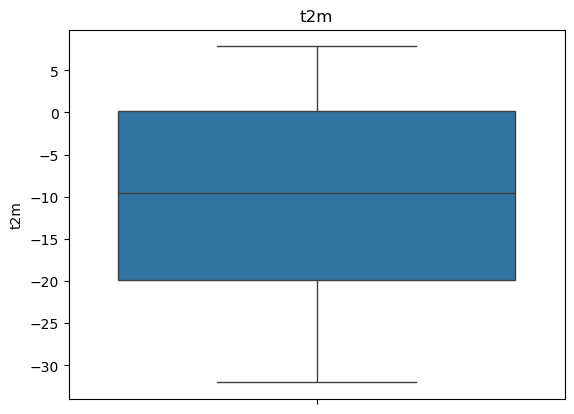

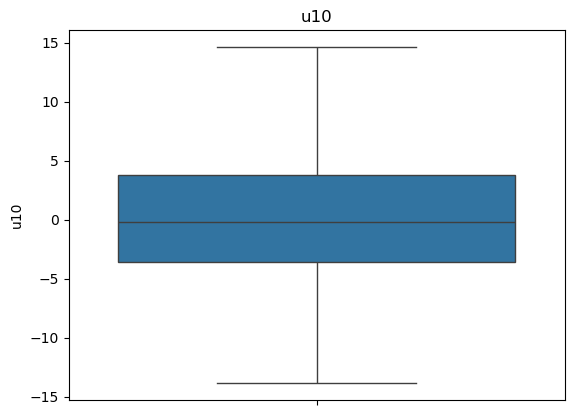

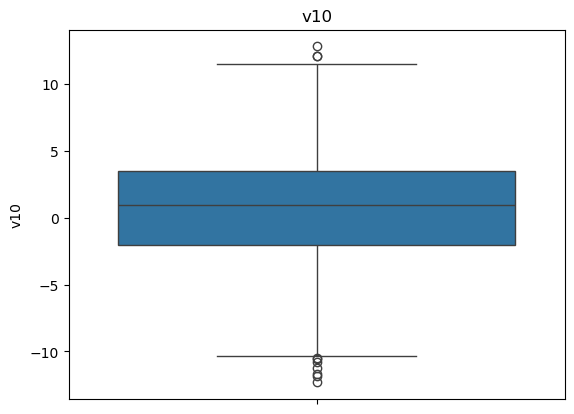

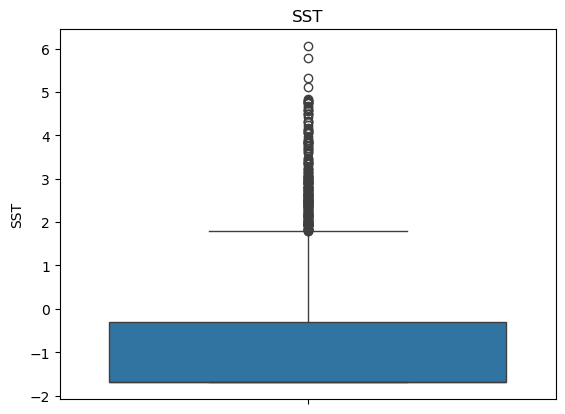

In [10]:
for col in numerical_var :
    boxplot_(data_combined,col)


#### Threshold of Y1

In [11]:
data_combined['Y1_seuil']=data_combined['Y1'].apply(lambda x: 1 if x != 0 else 0)

<Axes: xlabel='Y1_seuil'>

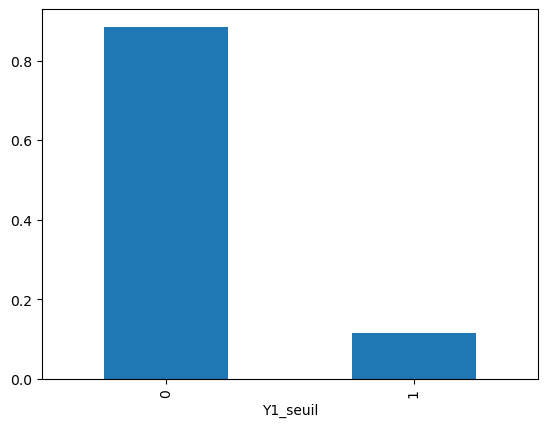

In [12]:
data_combined.Y1_seuil.value_counts(normalize=True).plot(kind='bar')

### Box bivar

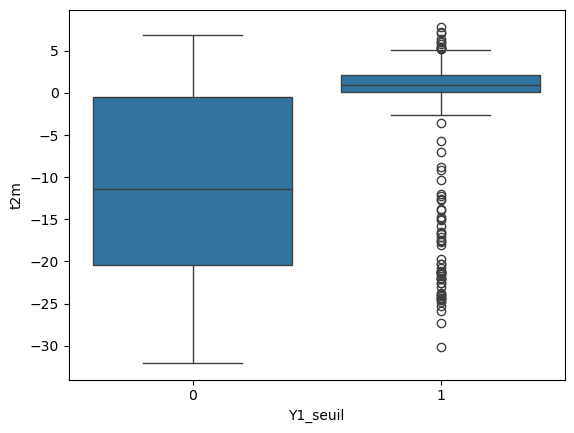

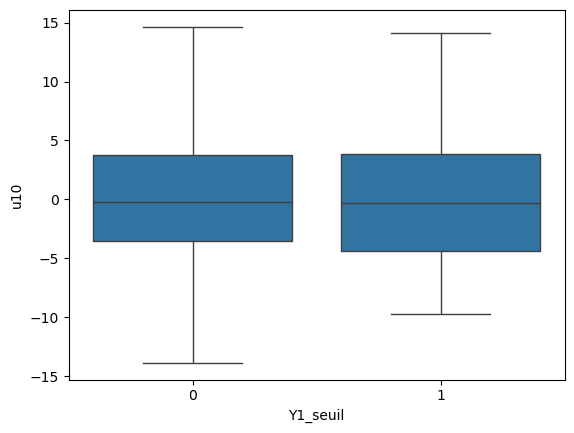

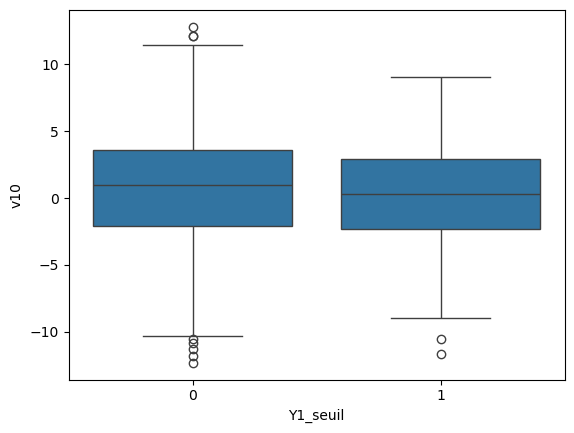

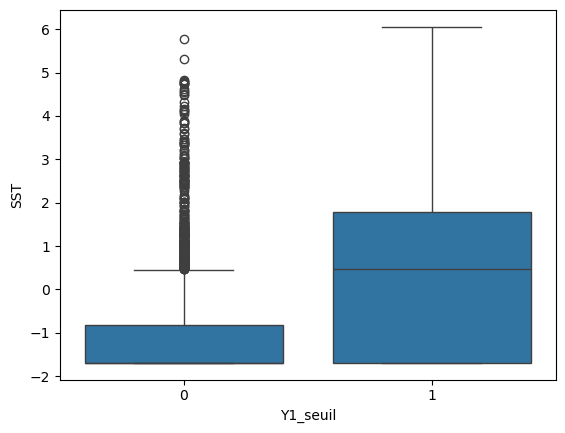

<Figure size 640x480 with 0 Axes>

In [13]:
for col in numerical_var :
    boxplot_biv(data_combined,col,target_name="Y1_seuil")
    plt.savefig(r"C:\Users\Ninette HOUKPONOU\Documents\M2DS_Paris_Saclay\ML1")

By analyzing the box plots, we can say that :
 - tm2 : The temperature measured at two meters from the ground is much lower when no sound detection is observed than when detection is observed.
 - v10 :
 - SST: Sea surface temperature is significantly higher when infrasound detections are observed than when they are not.
 - SIC: Sea ice concentration seems higher when there is no detection.
 - For r1,r2,r3,r4 and r5 we can also say that the water flow observed when there is infrasound detection is significantly higher than when there is noersion)

### Histogram

In [48]:
numerical_var = ['r3_MAR', 'r4_MAR', 'r5_MAR']

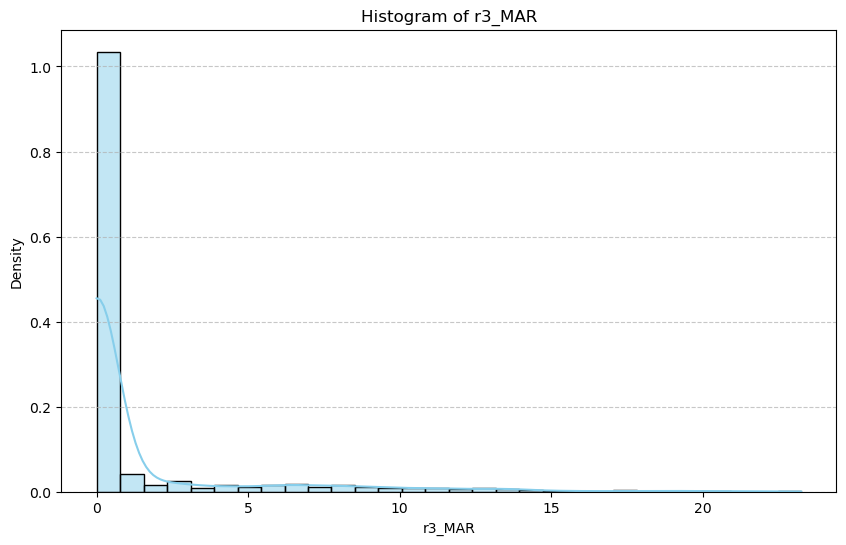

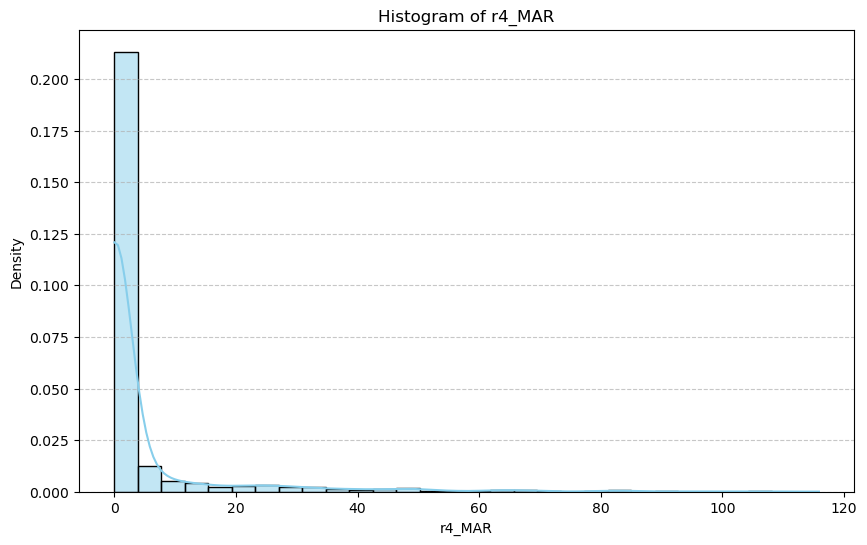

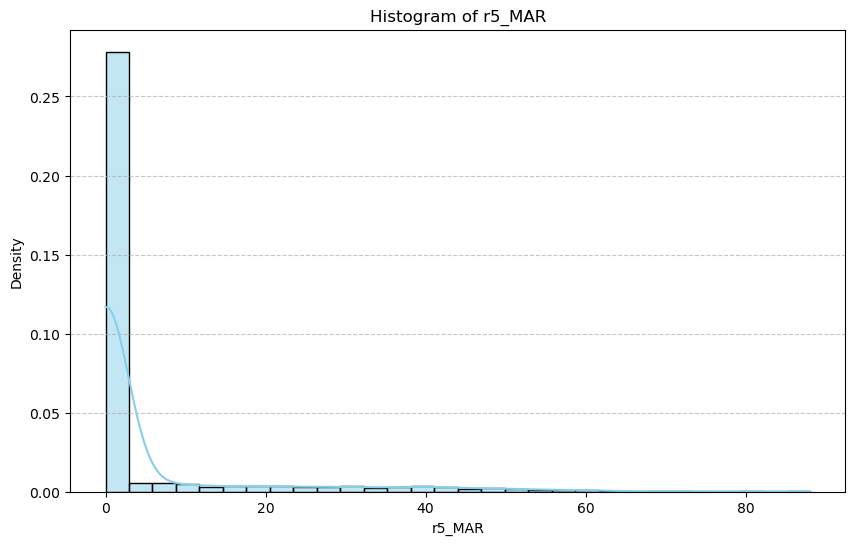

In [49]:
for col in numerical_var :
    plot_histogram_with_density(data_combined,col)

### Correlation

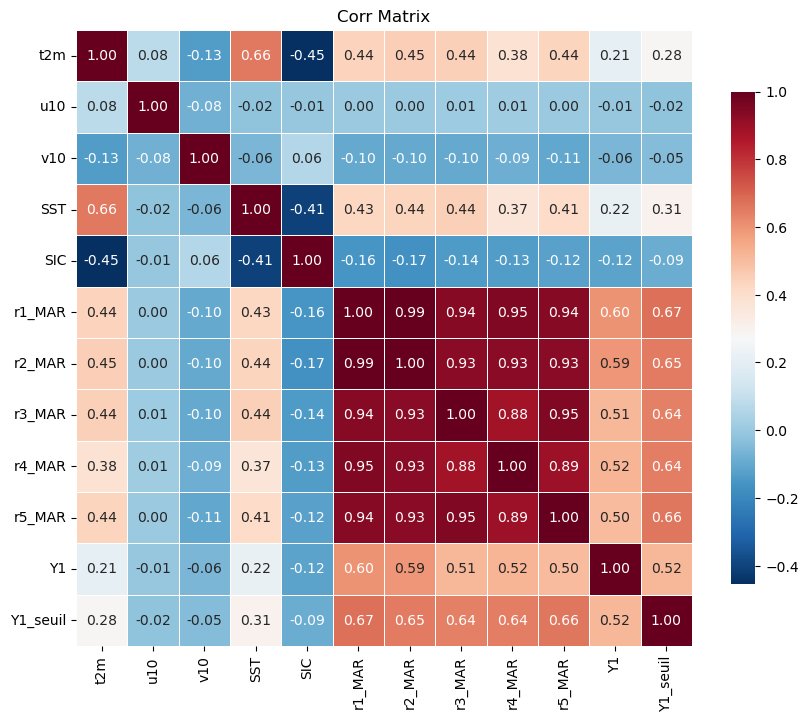

In [16]:
corr_plot(data_combined,cmap='RdBu_r')

The var r1,r2,r3,r4 and r5 appear to be highly correlated with the target variable and with each other. We will therefore apply a PCA to these 5 var in order to obtain a component that gathers the information they bring to the modeling.

# Preprocessing

## PCA

Since the variables are highly correlated with the target variable and highly correlated with each other, we'll apply a PCA to them in order to obtain the information contained in a single var.

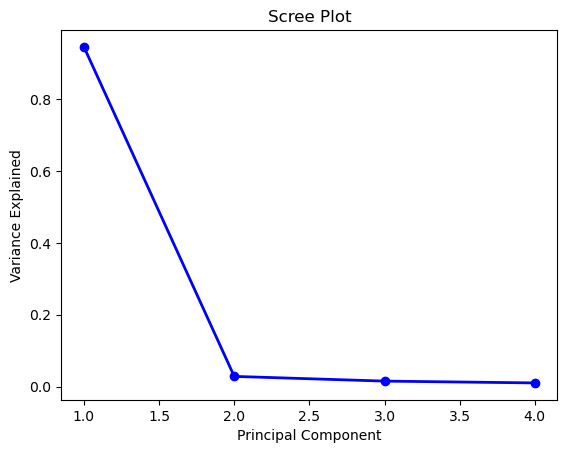

In [17]:
data_R=data_combined[['r1_MAR', 'r2_MAR', 'r3_MAR', 'r4_MAR', 'r5_MAR']]
pca_df, pca_variance = PCA_model(data_R)

In [18]:
pca_variance

array([0.94570839, 0.02826363, 0.01514197, 0.01009232])

In [19]:
print("The first component alone explains almost 95% of the variance. For the rest of this article, we'll focus on this single component.")

The first component alone explains almost 95% of the variance. For the rest of this article, we'll focus on this single component.


In [20]:
data_combined['Component_PCA']=pca_df["Composante 1"]

## Split of data

In [21]:
df=data_combined.copy()

In [22]:
df.drop(['r1_MAR', 'r2_MAR', 'r3_MAR', 'r4_MAR', 'r5_MAR','Y1'],axis=1, inplace=True)

In [23]:
df.head()

,t2m,u10,v10,SST,SIC,Y1_seuil,Component_PCA
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0,-0.859688
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0,-0.859689
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0,-0.859689
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0,-0.859689
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0,-0.859690


In [24]:
X_train,X_test,y_train,y_test=separation_of_train_test(df,'Y1_seuil')

In [25]:
print(y_test.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

Y1_seuil
0    0.885267
1    0.114733
Name: proportion, dtype: float64
Y1_seuil
0    0.884852
1    0.115148
Name: proportion, dtype: float64


So, in sharing our data, we made sure that the distribution of 0s and 1s was approximately the same in both training and test data.

## Standardization

In [26]:
X_train_standardized,scaler=to_standardized(X_train)

In [27]:
X_test_standardized=scaler.transform(X_test)

In [28]:
X_test_standardized=pd.DataFrame(X_test_standardized,columns=X_train_standardized.columns)

## Feature selection

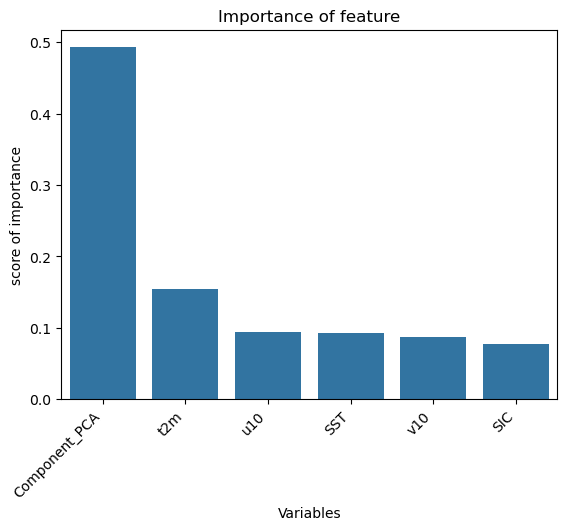

In [29]:
x_train_selected, x_test_selected = features_selection(X_train_standardized,X_test_standardized,y_train,seuil=0.05)

## Resampling of data

In [30]:
x_train_resampled,y_resampled,resampler=resampling_data(x_train_selected,y_train,target_name="Y1_seuil")

<Axes: xlabel='Y1_seuil'>

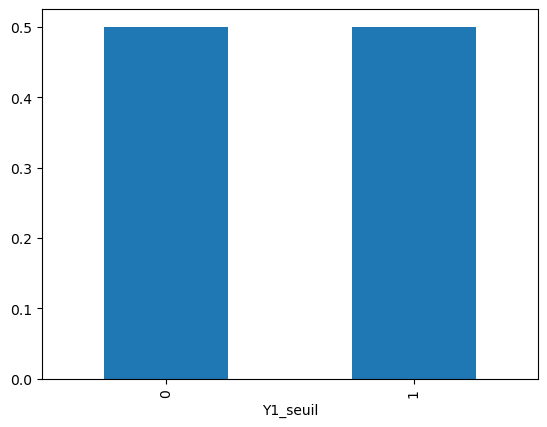

In [31]:
y_resampled.value_counts(normalize=True).plot(kind="bar")

## Computation of model

In [32]:
### Naives Bayes

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       679
           1       0.46      0.74      0.57        88

    accuracy                           0.87       767
   macro avg       0.71      0.81      0.75       767
weighted avg       0.91      0.87      0.88       767



C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\module\to_plot_roc_auc.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', color="green")


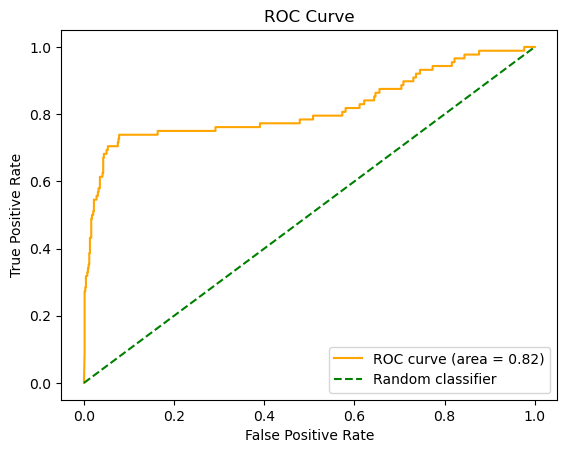

In [33]:
naive=compute_model("Naive")
naive.fit(x_train_resampled,y_resampled)
evaluation_of_model(naive,x_test_selected,y_test)
plot_roc(naive, x_test_selected,y_test)

In [34]:
### Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       679
           1       0.64      0.66      0.65        88

    accuracy                           0.92       767
   macro avg       0.80      0.81      0.80       767
weighted avg       0.92      0.92      0.92       767



C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\module\to_plot_roc_auc.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', color="green")


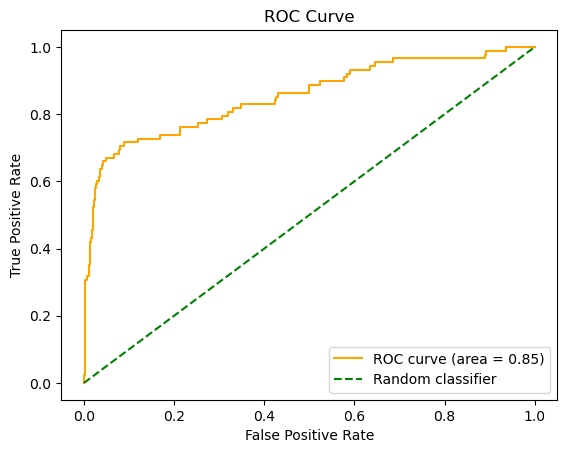

In [35]:
logist=compute_model("logistic")
logist.fit(x_train_resampled,y_resampled)
evaluation_of_model(logist,x_test_selected,y_test)
plot_roc(logist, x_test_selected,y_test)

### Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       679
           1       0.65      0.67      0.66        88

    accuracy                           0.92       767
   macro avg       0.80      0.81      0.81       767
weighted avg       0.92      0.92      0.92       767



C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\module\to_plot_roc_auc.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', color="green")


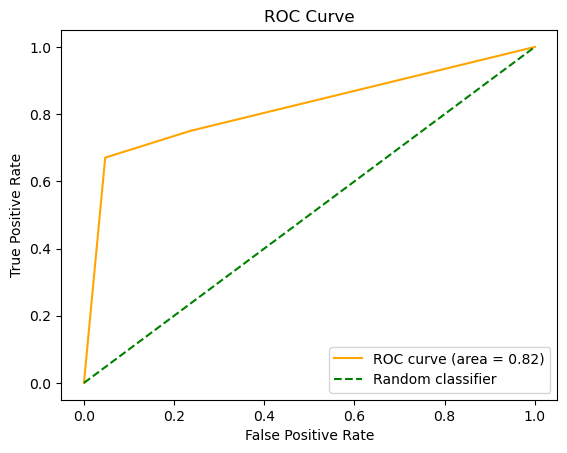

In [36]:
decision_tree=compute_model("Decision Tree")
decision_tree.fit(x_train_resampled,y_resampled)
evaluation_of_model(decision_tree,x_test_selected,y_test)
plot_roc(decision_tree, x_test_selected,y_test)

### XGboost

C:\Users\Ninette HOUKPONOU\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:38:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       679
           1       0.65      0.66      0.66        88

    accuracy                           0.92       767
   macro avg       0.80      0.81      0.81       767
weighted avg       0.92      0.92      0.92       767



C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\module\to_plot_roc_auc.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', color="green")


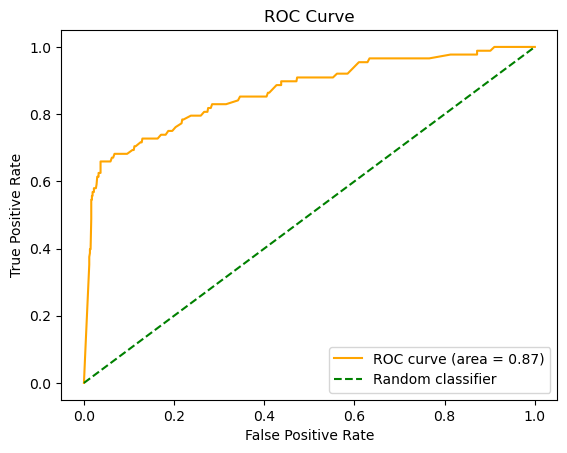

In [37]:
xgb=compute_model("xgboost")
xgb.fit(x_train_resampled,y_resampled)
evaluation_of_model(xgb,x_test_selected,y_test)
plot_roc(xgb, x_test_selected,y_test)

### Random forest

In [38]:
random_forest=compute_model("rdf")

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       679
           1       0.65      0.66      0.66        88

    accuracy                           0.92       767
   macro avg       0.80      0.81      0.81       767
weighted avg       0.92      0.92      0.92       767



C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\module\to_plot_roc_auc.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', color="green")


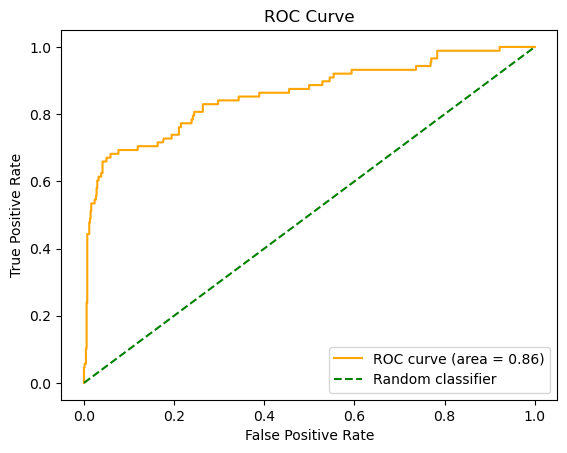

In [39]:
random_forest.fit(x_train_resampled,y_resampled)
evaluation_of_model(random_forest,x_test_selected,y_test)
plot_roc(random_forest, x_test_selected,y_test)

# Optimization

##### After a GridSearch, the best model is the random forest with parameters n_estimators=30,max_depth=5

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       679
           1       0.65      0.66      0.66        88

    accuracy                           0.92       767
   macro avg       0.80      0.81      0.81       767
weighted avg       0.92      0.92      0.92       767



C:\Users\Ninette HOUKPONOU\Repertoire_python\M2_DS\TP\module\to_plot_roc_auc.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', color="green")


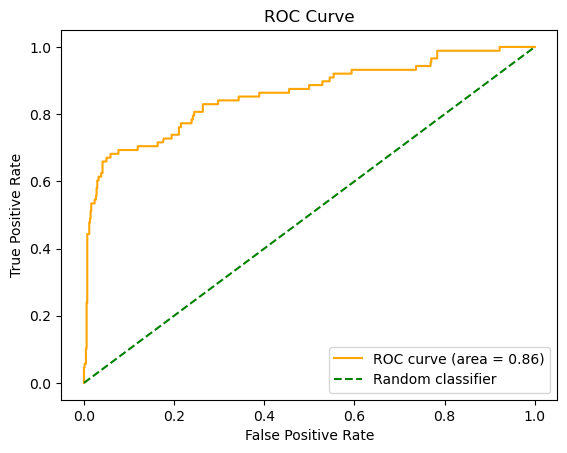

In [40]:
seed=1234
from sklearn.ensemble import RandomForestClassifier
final_model=RandomForestClassifier(n_estimators=30,max_depth=5,random_state=seed)
final_model.fit(x_train_resampled,y_resampled)
evaluation_of_model(final_model,x_test_selected,y_test)
plot_roc(final_model, x_test_selected,y_test)

# Cross validation

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model, x_test_selected, y_test, cv=5)
print(scores)
scores.mean()

[0.88311688 0.93506494 0.89542484 0.92810458 0.95424837]


0.9191919191919192